In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import sys


In [2]:
expt_name = 'WestDock'
maindir = 'Permafrost/WestDock/'
hdbfinal = pd.read_pickle("Permafrost/WestDock/20180904hdbfinal")

In [464]:
minimetacontigs = hdbfinal[~hdbfinal.index.str.contains('Bulk')]
minimetacontigs.to_pickle('Permafrost/WestDock/bins/fasta/'+expt_name+'_minimetaContigs')

In [470]:
import fasta_from_df as fastaW
import imp
imp.reload(fastaW) # this is for testing the function

<module 'fasta_from_df' from '/home/bojk/Data/fasta_from_df.py'>

In [472]:
pathtofasta = '/home/datastorage/ASSEMBLY_DATA/PermafrostWestDock/Combined_Analysis/'
fastaname = 'super_contigs.PermafrostWestDock.fasta'
dfpath = 'Permafrost/WestDock/bins/fasta/'; dfname = expt_name+'_minimetaContigs'
fastaW.make_fasta_from_df(pathtofasta,fastaname,dfpath,dfname)

()

In [479]:
hdbfinal.groupby('Bin').sum('Sequence Length').count('Read Depth')


TypeError: f() takes 1 positional argument but 2 were given

# Sub tSNEs

In [ ]:
bulkretsne = pd.read_pickle('Permafrost/WestDock/subtsne_westdock/kmer5occurrence_bhtsne_locations_30.WestDock_bin_000.')

In [ ]:
# this plots and saves all the tsne ascii files in folder 'path'
# make sure that subdirectories 'dfs' and figs' exist
path = 'Permafrost/WestDock/subtsne_westdock/'
%run plottsne $path

In [117]:
# grep '>' subbin.fasta > subbin.txt to get the indices in the right order.
# will not make this into a .py file as I do not intend to use this too often
import os.path
binn = '081'
if binn=='000':
    index = list(pd.read_csv('Permafrost/WestDock/bins/fasta/WestDock_bin_'+binn+'_bulk.txt',header=None)[0].str[1:-1])
else:
    index = list(pd.read_csv('Permafrost/WestDock/bins/fasta/WestDock_bin_'+binn+'.txt',header=None)[0].str[1:-1])
folder = 'Permafrost/WestDock/subtsne_westdock/dfs/'
perp = [30,40,50,60,70,80]
data = None

for i in perp:
    fname = folder+'WestDock_bin_'+binn+'_kmer5occurrence_bhtsne_locations_'+str(i)
    if data is None:
        data = pd.read_pickle(fname)
        data.drop('index',axis=1,inplace=True)
    else:
        if os.path.isfile(fname):
            temp = pd.read_pickle(fname)
            data = data.join(temp)
            data.drop('index',axis=1,inplace=True)
keys = list(data.index)
indict = dict(zip(keys,index))
data.rename(index=indict,columns=None,inplace=True)
data = data.join(hdbfinal)
data.to_pickle(folder+expt_name+'_retSNE_bin_'+binn)



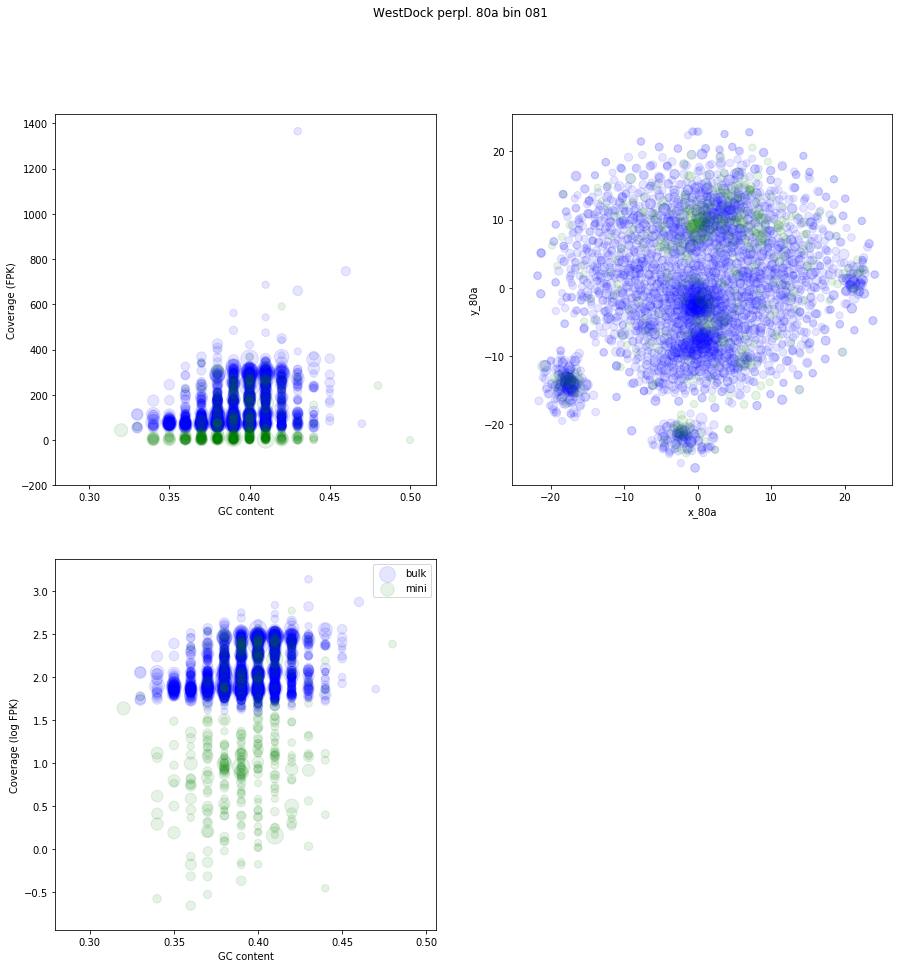

In [142]:
data

tempdf_sel_b = data[data.index.str.contains('Bulk')]
tempdf_sel_m = data[~data.index.str.contains('Bulk')]

xcol = 'GC Content';ycol = 'FPK'
perp = '80a'

f = plt.figure()
gs = gridspec.GridSpec(2,2)
ax1 = f.add_subplot(gs[0,0])
if len(tempdf_sel_b)>0:tempdf_sel_b.plot.scatter(xcol,ycol,s=tempdf_sel_b['Sequence Length'].divide(1e2),alpha=.1,ax=ax1,c='b')
if len(tempdf_sel_m)>0:tempdf_sel_m.plot.scatter(xcol,ycol,s=tempdf_sel_m['Sequence Length'].divide(1e2),alpha=.1,ax=ax1,c='g')
plt.suptitle(expt_name+' perpl. '+perp+' bin '+binn)
#plt.xlim(.2,.8)
plt.ylabel('Coverage (FPK)');plt.xlabel('GC content')

ax3 = f.add_subplot(gs[1,0])
if len(tempdf_sel_b)>0:tempdf_sel_b.plot.scatter(xcol,'FPK_log',s=tempdf_sel_b['Sequence Length'].divide(1e2),alpha=.1,ax=ax3,c='b')
if len(tempdf_sel_m)>0:tempdf_sel_m.plot.scatter(xcol,'FPK_log',s=tempdf_sel_m['Sequence Length'].divide(1e2),alpha=.1,ax=ax3,c='g')
if len(tempdf_sel_m)==0:
    plt.legend(['bulk'])
elif len(tempdf_sel_b)==0:
    plt.legend(['mini'])
else: plt.legend(['bulk','mini'])
#plt.xlim(.2,.8)
plt.ylabel('Coverage (log FPK)');plt.xlabel('GC content')

ax4 = f.add_subplot(gs[0,1])
if len(tempdf_sel_b)>0:tempdf_sel_b.plot.scatter('x_'+perp,'y_'+perp,s=tempdf_sel_b['Sequence Length'].divide(1e2),alpha=.1,ax=ax4,c='b')
if len(tempdf_sel_m)>0:tempdf_sel_m.plot.scatter('x_'+perp,'y_'+perp,s=tempdf_sel_m['Sequence Length'].divide(1e2),alpha=.1,ax=ax4,c='g')         

f.set_figheight(15)
f.set_figwidth(15)
plt.show()

In [143]:
import hdbscan

In [1136]:
np.sort(hdbfinal["Bin"].unique())[::-1]

array(['089', '088', '087', '086', '085', '084', '083', '082', '081',
       '080', '079', '078', '077', '076', '075', '074', '073', '072',
       '071', '070', '069', '068', '067', '066', '065', '064', '063',
       '062', '061', '060', '059', '058', '057', '056', '055', '054',
       '053', '052', '051', '050', '049', '048', '047', '046', '045',
       '044', '043', '042', '041', '040', '039', '038', '037', '036',
       '035', '034', '033', '032', '031', '030', '029', '028', '027',
       '026', '025', '024', '023', '022', '021', '020', '019', '018',
       '017', '016', '015', '014', '013', '012', '011', '010', '009',
       '008', '007', '006', '005', '004', '003', '002', '001', '000'],
      dtype=object)

In [ ]:
df_hdb  = plot_clusters(data,60,'no', {'min_cluster_size':40},)

In [185]:
path = 'Permafrost/WestDock/subtsne_westdock/dfs/'
name = 'WestDock_retSNE_bin_000'
hdbargs = 40
%run hdbscan_plot.py $path $name $hdbargs



"""
name = 'WestDock_retSNE_bin_063'
%run hdbscan_plot.py $path $name $hdbargs
name = 'WestDock_retSNE_bin_067'
%run hdbscan_plot.py $path $name $hdbargs
name = 'WestDock_retSNE_bin_081'
%run hdbscan_plot.py $path $name $hdbargs"""

"name = 'WestDock_retSNE_bin_017'\n%run hdbscan_plot.py $path $name $hdbargs\nname = 'WestDock_retSNE_bin_063'\n%run hdbscan_plot.py $path $name $hdbargs\nname = 'WestDock_retSNE_bin_067'\n%run hdbscan_plot.py $path $name $hdbargs\nname = 'WestDock_retSNE_bin_081'\n%run hdbscan_plot.py $path $name $hdbargs"

In [184]:
hdbargs = 40
name = 'WestDock_retSNE_bin_001'
%run hdbscan_plot.py $path $name $hdbargs

In [182]:
hdbargs = 20
name = 'WestDock_retSNE_bin_017'
%run hdbscan_plot.py $path $name $hdbargs

In [186]:
hdbargs = 20
name = 'WestDock_retSNE_bin_063'
%run hdbscan_plot.py $path $name $hdbargs

In [198]:
path = 'Permafrost/WestDock/subtsne_westdock/dfs/'
min_cluster_size = 81
min_samples = 23
name = 'WestDock_retSNE_bin_081'
%run hdbscan_plot.py $path $name $min_cluster_size $min_samples

23


In [208]:
hdbargs = 42
name = 'WestDock_retSNE_bin_081'
%run hdbscan_plot.py $path $name $hdbargs

In [ ]:
hdbscan.HDBSCAN

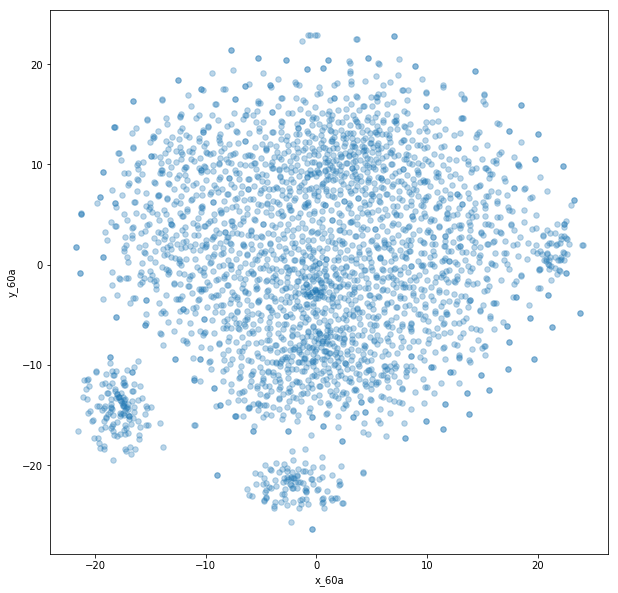

In [189]:
#unbiased density projection 
datat = pd.read_pickle(path+name)
datat.plot.scatter('x_60a','y_60a',alpha=.3,figsize=(10,10),s=30)
plt.show()

# Write subcluster fastas

In [202]:
path2fasta = 'Permafrost/WestDock/bins/fasta/'
fastaname = 'WestDock_bin_000_bulk.fasta'
path2df = 'Permafrost/WestDock/subtsne_westdock/dfs/'
dfname = 'WestDock_retSNE_bin_000_hdb_perp__30MinCluSi_40'
%run make_cluster_fasta.py $path2fasta $fastaname $path2df $dfname

In [203]:
path2fasta = 'Permafrost/WestDock/bins/fasta/'
fastaname = 'WestDock_bin_001.fasta'
path2df = 'Permafrost/WestDock/subtsne_westdock/dfs/'
dfname = 'WestDock_retSNE_bin_001_hdb_perp__30MinCluSi_20'
%run make_cluster_fasta.py $path2fasta $fastaname $path2df $dfname

In [208]:
path2fasta = 'Permafrost/WestDock/bins/fasta/'
fastaname = 'WestDock_bin_017.fasta'
path2df = 'Permafrost/WestDock/subtsne_westdock/dfs/'
dfname = 'WestDock_retSNE_bin_017_hdb_perp__60MinCluSi_20'
%run make_cluster_fasta.py $path2fasta $fastaname $path2df $dfname

In [209]:
path2fasta = 'Permafrost/WestDock/bins/fasta/'
fastaname = 'WestDock_bin_063.fasta'
path2df = 'Permafrost/WestDock/subtsne_westdock/dfs/'
dfname = 'WestDock_retSNE_bin_063_hdb_perp__40MinCluSi_20'
%run make_cluster_fasta.py $path2fasta $fastaname $path2df $dfname

In [210]:
path2fasta = 'Permafrost/WestDock/bins/fasta/'
fastaname = 'WestDock_bin_067.fasta'
path2df = 'Permafrost/WestDock/subtsne_westdock/dfs/'
dfname = 'WestDock_retSNE_bin_067_hdb_perp__50MinCluSi_25'
%run make_cluster_fasta.py $path2fasta $fastaname $path2df $dfname

In [211]:
path2fasta = 'Permafrost/WestDock/bins/fasta/'
fastaname = 'WestDock_bin_081.fasta'
path2df = 'Permafrost/WestDock/subtsne_westdock/dfs/'
dfname = 'WestDock_retSNE_bin_081_hdb_perp__60MinCluSi_40'
%run make_cluster_fasta.py $path2fasta $fastaname $path2df $dfname

# Pruning of bulk/mini bins

In [41]:
import checkm_out_plot as copl
imp.reload(copl)

<module 'checkm_out_plot' from '/home/bojk/Data/checkm_out_plot.py'>

In [42]:
checkmsub_mini = pd.read_pickle('Permafrost/WestDock/bins/output/minifasta/outm/output_table')
checkmsub_bulk = pd.read_pickle('Permafrost/WestDock/bins/output/bulkfasta/out/output_table')
checkmsub_bulk['Contamination'] = [f/f*120 if f>120 else f for f in checkmsub_bulk['Contamination']]
checkmsub_mini['Contamination'] = [f/f*120 if f>120 else f for f in checkmsub_mini['Contamination']]
checkmsub_bulk['bin origin'] = 'bulk';checkmsub_mini['bin origin'] = 'mini'
copl.compare_two_checkmdfs(checkmsub_bulk,checkmsub_mini,'bin origin','Permafrost/WestDock/bins/output/','WD_checkm_BulkVsMini2')

In [213]:
# minimeta bins that do not need further pruning
mini_noprun = checkmsub_mini[(checkmsub_mini['Completeness']>20)&(checkmsub_mini['Contamination']<5)&(checkmsub_mini['Strain heterogeneity']<5)]
# bulk bins ~
bulk_noprun = checkmsub_bulk[(checkmsub_bulk['Completeness']>20)&(checkmsub_bulk['Contamination']<5)&(checkmsub_bulk['Strain heterogeneity']<5)]

In [214]:
# bins that are worth pruning (i.e. completeness>20)
mini_prun = checkmsub_mini[(checkmsub_mini['Completeness']>20)&(~checkmsub_mini.index.isin(mini_noprun.index))]
bulk_prun = checkmsub_bulk[(checkmsub_bulk['Completeness']>20)&(~checkmsub_bulk.index.isin(bulk_noprun.index))]

In [217]:
len(mini_prun)
len(bulk_prun)

46

## first plot bins to be pruned (bulk/mini separately)

In [226]:
hdbfinal[hdbfinal.index.str.contains('Bulk')].to_pickle('Permafrost/WestDock/20180904hdbfinal_bulk')
hdbfinal[~hdbfinal.index.str.contains('Bulk')].to_pickle('Permafrost/WestDock/20180904hdbfinal_mini')
bulk_prun.to_pickle('Permafrost/WestDock/bins/bulk_only/bulk_bins_tobepruned')
mini_prun.to_pickle('Permafrost/WestDock/bins/mini_only/mini_bins_tobepruned')

In [231]:
bulkmaindf = 'Permafrost/WestDock/20180904hdbfinal_bulk' # this is the bulk part of hdbfinal saved above 
bulkpath = 'Permafrost/WestDock/bins/bulk_only/'
bulkcheckmbinstobepruned = 'bulk_bins_tobepruned' # this is bulk_prun saved above

%run checkmdf_plot.py $bulkpath $bulkcheckmbinstobepruned $bulkmaindf

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AttributeError: 'Figure' object has no attribute 'close'

In [229]:
minimaindf = 'Permafrost/WestDock/20180904hdbfinal_mini' # this is the mini part of hdbfinal saved above 
minipath = 'Permafrost/WestDock/bins/mini_only/'
minicheckmbinstobepruned = 'mini_bins_tobepruned' # this is mini_prun saved above

%run checkmdf_plot.py $minipath $minicheckmbinstobepruned $minimaindf

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## then make a subselection in gc-cov or tsne space based on the plots made above

### let's do gc first

In [290]:
import prune_bins_gccov as prune

In [387]:
import imp
imp.reload(prune) # this is for testing the function

<module 'prune_bins_gccov' from '/home/bojk/Data/prune_bins_gccov.py'>

In [434]:
%time
maindf = 'Permafrost/WestDock/20180904hdbfinal_mini'# df containing contigs (in this case bulk or mini)
fastadir = 'Permafrost/WestDock/bins/fasta/'
covmu = 1.5; covspread = .15; log = 'yes' # midpoint+total range coverage, and whether this is in log space or not
gcmu = .34;gcspr = .055
tsne = [-33.9,2,-12.2,1.5] #tSNE: x_mean,x_spread,y_mean,y_spread
binnum = '013'# bin number (as noted in maindf 'DBclusternum', column 'subnum will be altered here, and saved)
subnum = '01'
keys = ['expt_name','coverage_mean','coverage_spread','log','bin_number','subbin_num','gc_mean','gc_spread']#,'tsne']
values = [expt_name,covmu,covspread,log,binnum,subnum,gcmu,gcspr]#,tsne]
inlist = dict(zip(keys,values))
prune.prune_bin(maindf,fastadir,**inlist)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 8.34 µs


/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


# density based subclustering

In [480]:
import subcluster_bins as hdbsub

In [663]:
imp.reload(hdbsub)

<module 'subcluster_bins' from '/home/bojk/Data/subcluster_bins.py'>

In [776]:
# mini
%time
maindf = 'Permafrost/WestDock/20180904hdbfinal_mini'# df containing contigs (in this case bulk or mini)
fastadir = 'Permafrost/WestDock/bins/fasta/'
log = 'no' # cluster in log space or not
binnum = '081'# bin number (as noted in maindf 'DBclusternum', column 'subnum will be altered here, and saved)
subnum = '01'
minCS = 25
minS = 1
ASC = True
CSM = 'eom' # 'leaf' or 'eom'
keys = ['expt_name','min_cluster_size','min_samples','allow_single_cluster','log','bin_number','subbin_num','cluster_selection_method']#,'tsne']
values = [expt_name,minCS,minS,ASC,log,binnum,subnum,CSM]
inlist = dict(zip(keys,values))
hdbsub.subcluster_bin(maindf,fastadir,**inlist)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


/home/bojk/Data/subcluster_bins.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['subclusternum'] = labels[0:len(df)] #add cluster numbers to main df
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [716]:
# read che

In [19]:
import checkm_out as cm

In [20]:
checkmdf = cm.make_checkm_output_df('Permafrost/WestDock/bins/fasta/subfasta/checkm/hdbtest/','hdbtest_outputfile.txt')

In [1045]:
# good bins
checkmdf_good = checkmdf[(checkmdf['Completeness']>=20)&(checkmdf['Contamination']<=5)&(checkmdf['Strain heterogeneity']<=5)].sort_index()

In [1114]:
#bins worth looking into 
checkmdf_wp = checkmdf[(checkmdf['Completeness']>=20)&(~checkmdf.index.isin(checkmdf_good.index))].sort_index()
checkmdf_nope = checkmdf[(~checkmdf.index.isin(checkmdf_good.index))&(~checkmdf.index.isin(checkmdf_wp.index))]

In [25]:
checkmdf[checkmdf.index.str.contains('bin_002')]


,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,bin type
0,,,,,,,,,,,,,,,,,
WestDock_bin_002sub_bin_01_mini,k__Bacteria,57.6104,5.98291,94,1218994,2258,117,188,1238,0.913245,0.497125,0.0163223,34570,12968,15073,87.50,pruned
WestDock_bin_002sub_bin_07_mini_subbin_1,k__Bacteria,34.4828,3.44828,71,849020,5449,58,104,865,0.906417,0.492356,0.0201919,31872,11958,14081,100.00,pruned
WestDock_bin_002sub_bin_02_mini,k__Bacteria,32.8241,0.854701,45,749810,2258,117,188,757,0.910541,0.495193,0.014903,34570,16662.4,19278,50.00,pruned
WestDock_bin_002sub_bin_07_mini_subbin_0,k__Bacteria,30.6873,1.7094,36,479245,2258,117,188,510,0.917364,0.492356,0.0158088,34570,13312.4,16032,66.67,pruned
WestDock_bin_002sub_bin_06_mini_subbin_0,k__Bacteria,30.6873,1.7094,36,479245,2258,117,188,510,0.917364,0.492356,0.0158088,34570,13312.4,16032,66.67,pruned
WestDock_bin_002sub_bin_05_mini,k__Bacteria,30.26,0.854701,32,449845,2258,117,188,478,0.918321,0.494677,0.0163928,34570,14057.7,16032,50.00,pruned
WestDock_bin_002sub_bin_06_mini_subbin_2,k__Bacteria,27.5862,0,39,510116,5449,58,104,508,0.911816,0.494897,0.0177205,31872,13079.9,15073,0.00,pruned
WestDock_bin_002sub_bin_03_mini,k__Bacteria,22.4138,3.44828,61,829750,5449,58,104,828,0.909591,0.499818,0.0131306,31872,13602.5,15268,100.00,pruned
WestDock_bin_002sub_bin_04_mini,k__Bacteria,22.4138,1.72414,48,593120,5449,58,104,597,0.906237,0.496567,0.0224249,31872,12356.7,14353,100.00,pruned


In [23]:
cm_mini_old['bin type'] = 'original'
checkmdf['bin type'] = 'pruned'


In [27]:
# make comparison to pre-subcluster bin quality

copl.compare_two_checkmdfs(cm_mini_old,checkmdf,'bin type','Permafrost/WestDock/bins/mini_only/','WD_checkm_BeforeVsAfterPruning')

In [22]:
cm_mini_old = pd.read_pickle('Permafrost/WestDock/bins/output/minifasta/outm/output_table')
cm_mini_old_good = cm_mini_old[(cm_mini_old['Completeness']>=20)&(cm_mini_old['Contamination']<=5)& (cm_mini_old['Strain heterogeneity']<=5)]
cm_mini_old_wp = cm_mini_old[(cm_mini_old['Completeness']>=20)&(~cm_mini_old.index.isin(cm_mini_old_good.index))]

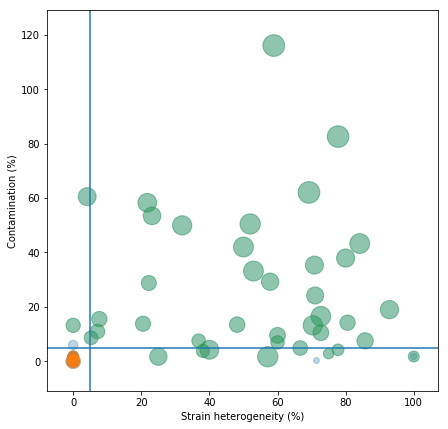

In [1044]:
f = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = f.add_subplot(gs[0,0])
ax1.scatter(cm_mini_old['Strain heterogeneity'],cm_mini_old['Contamination'],s=cm_mini_old['Completeness'].astype(int)*5,alpha=.3)
ax1.scatter(cm_mini_old_good['Strain heterogeneity'],cm_mini_old_good['Contamination'],s=cm_mini_old_good['Completeness'].astype(int)*5,alpha=.3)
ax1.scatter(cm_mini_old_wp['Strain heterogeneity'],cm_mini_old_wp['Contamination'],s=cm_mini_old_wp['Completeness'].astype(int)*5,alpha=.3)
ax1.axvline(5,0,100)
ax1.axhline(5,0,100)
#cm_mini_old.plot.scatter('Strain heterogeneity','Contamination',alpha=.3)
#plt.scatter(cm_mini_old['Strain heterogeneity'],cm_mini_old['Contamination'],s=cm_mini_old['Completeness'].astype(int),alpha=.3)
plt.xlabel('Strain heterogeneity (%)')
plt.ylabel('Contamination (%)')


f.set_figheight(7)
f.set_figwidth(7)
plt.show()

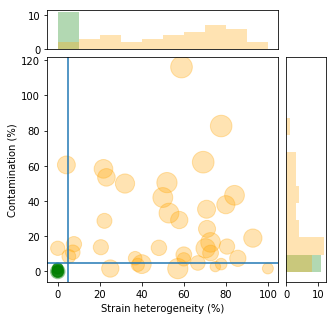

In [1141]:
f = plt.figure()
gs = gridspec.GridSpec(6,6)
ax1 = f.add_subplot(gs[1:,0:-1])
#ax1.scatter(cm_mini_old['Strain heterogeneity'],cm_mini_old['Contamination'],s=cm_mini_old['Completeness'].astype(int)*5,alpha=.3)
ax1.scatter(cm_mini_old_good['Strain heterogeneity'],cm_mini_old_good['Contamination'],s=cm_mini_old_good['Completeness'].astype(int)*5,alpha=.3,c='g')
ax1.scatter(cm_mini_old_wp['Strain heterogeneity'],cm_mini_old_wp['Contamination'],s=cm_mini_old_wp['Completeness'].astype(int)*5,alpha=.3,c='orange')

#ax1.scatter(checkmdf_good['Strain heterogeneity'],checkmdf_good['Contamination'],s=checkmdf_good['Completeness'].astype(int)*5,alpha=.3,c='g')
#ax1.scatter(checkmdf_wp['Strain heterogeneity'],checkmdf_wp['Contamination'],s=checkmdf_wp['Completeness'].astype(int)*5,alpha=.3,c='orange')
#ax1.scatter(checkmdf_nope['Strain heterogeneity'],checkmdf_nope['Contamination'],s=checkmdf_nope['Completeness'].astype(int)*5,alpha=.3,c=[.5,.5,.5])

ax1.axvline(5,0,100)
ax1.axhline(5,0,100)
#cm_mini_old.plot.scatter('Strain heterogeneity','Contamination',alpha=.3)
#plt.scatter(cm_mini_old['Strain heterogeneity'],cm_mini_old['Contamination'],s=cm_mini_old['Completeness'].astype(int),alpha=.3)
plt.xlabel('Strain heterogeneity (%)')
plt.ylabel('Contamination (%)')

ax2 = f.add_subplot(gs[0,:-1])
ax2.hist(cm_mini_old_good['Strain heterogeneity'],range(-5,105,10),color='g',alpha=.3)
ax2.hist(cm_mini_old_wp['Strain heterogeneity'],range(-5,105,10),color='orange',alpha=.3)
#ax2.hist(checkmdf_good['Strain heterogeneity'],range(-5,105,10),color='g',alpha=.3)
#ax2.hist(checkmdf_wp['Strain heterogeneity'],range(-5,105,10),color='orange',alpha=.3)
#ax2.hist(checkmdf_nope['Strain heterogeneity'],range(-5,105,10),color='gray',alpha=.3)
plt.xticks([])
ax3 = f.add_subplot(gs[1:,-1])
#sns.distplot(cm_mini_old_wp['Contamination'],color="skyblue",vertical=True)
ax3.hist(cm_mini_old_good['Contamination'].astype(float),range(-5,120,10),alpha=.3,color='g', orientation="horizontal",bottom=0)
ax3.hist(cm_mini_old_wp['Contamination'].astype(float),range(-5,120,10),alpha=.3,color='orange', orientation="horizontal")
#ax3.hist(checkmdf_good['Contamination'].astype(float),range(-5,120,10),alpha=.3, orientation="horizontal")
#ax3.hist(checkmdf_wp['Contamination'].astype(float),range(-5,120,10),alpha=.3, orientation="horizontal")
#ax3.hist(checkmdf_wp['Contamination'].astype(float),range(-5,120,10),alpha=.3, orientation="horizontal")
plt.yticks([])
f.set_figheight(5)
f.set_figwidth(5)
plt.show()
f.savefig('Permafrost/WestDock/bins/fasta/subfasta/plots/summary_mini_beforeclust.png')
f.savefig('Permafrost/WestDock/bins/fasta/subfasta/plots/summary_mini_beforeclust.pdf')

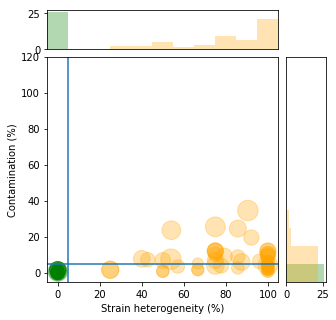

In [1148]:
f = plt.figure()
gs = gridspec.GridSpec(6,6)
ax1 = f.add_subplot(gs[1:,0:-1])
#ax1.scatter(cm_mini_old['Strain heterogeneity'],cm_mini_old['Contamination'],s=cm_mini_old['Completeness'].astype(int)*5,alpha=.3)
#ax1.scatter(cm_mini_old_good['Strain heterogeneity'],cm_mini_old_good['Contamination'],s=cm_mini_old_good['Completeness'].astype(int)*5,alpha=.3,c='b')
#ax1.scatter(cm_mini_old_wp['Strain heterogeneity'],cm_mini_old_wp['Contamination'],s=cm_mini_old_wp['Completeness'].astype(int)*5,alpha=.3,c='r')

ax1.scatter(checkmdf_good['Strain heterogeneity'],checkmdf_good['Contamination'],s=checkmdf_good['Completeness'].astype(int)*5,alpha=.3,c='g')
ax1.scatter(checkmdf_wp['Strain heterogeneity'],checkmdf_wp['Contamination'],s=checkmdf_wp['Completeness'].astype(int)*5,alpha=.3,c='orange')
#ax1.scatter(checkmdf_nope['Strain heterogeneity'],checkmdf_nope['Contamination'],s=checkmdf_nope['Completeness'].astype(int)*5,alpha=.3,c=[.5,.5,.5])

ax1.axvline(5,0,100)
ax1.axhline(5,0,100)
plt.ylim(-5,120)
#cm_mini_old.plot.scatter('Strain heterogeneity','Contamination',alpha=.3)
#plt.scatter(cm_mini_old['Strain heterogeneity'],cm_mini_old['Contamination'],s=cm_mini_old['Completeness'].astype(int),alpha=.3)
plt.xlabel('Strain heterogeneity (%)')
plt.ylabel('Contamination (%)')

ax2 = f.add_subplot(gs[0,:-1])
#ax2.hist(cm_mini_old_good['Strain heterogeneity'],range(-5,105,10),color='b',alpha=.3)
#ax2.hist(cm_mini_old_wp['Strain heterogeneity'],range(-5,105,10),color='r',alpha=.3)
ax2.hist(checkmdf_good['Strain heterogeneity'],range(-5,115,10),color='g',alpha=.3)
ax2.hist(checkmdf_wp['Strain heterogeneity'],range(-5,115,10),color='orange',alpha=.3)
plt.xlim(-5,105)
#ax2.hist(checkmdf_nope['Strain heterogeneity'],range(-5,105,10),color='gray',alpha=.3)
plt.xticks([])
ax3 = f.add_subplot(gs[1:,-1])
#sns.distplot(cm_mini_old_wp['Contamination'],color="skyblue",vertical=True)
#ax3.hist(cm_mini_old_good['Contamination'].astype(float),range(-5,120,10),alpha=.3,color='b', orientation="horizontal",bottom=0)
#ax3.hist(cm_mini_old_wp['Contamination'].astype(float),range(-5,120,10),alpha=.3,color='r', orientation="horizontal")
ax3.hist(checkmdf_good['Contamination'].astype(float),range(-5,120,10),alpha=.3,color='g', orientation="horizontal")
ax3.hist(checkmdf_wp['Contamination'].astype(float),range(-5,120,10),alpha=.3,color='orange', orientation="horizontal")
#ax3.hist(checkmdf_nope['Contamination'].astype(float),range(-5,120,10),alpha=.3,color='gray', orientation="horizontal")
plt.ylim(-5,120)
plt.yticks([])
f.set_figheight(5)
f.set_figwidth(5)
plt.show()
f.savefig('Permafrost/WestDock/bins/fasta/subfasta/plots/summary_mini_afterclust.png')
f.savefig('Permafrost/WestDock/bins/fasta/subfasta/plots/summary_mini_afterclust.pdf')

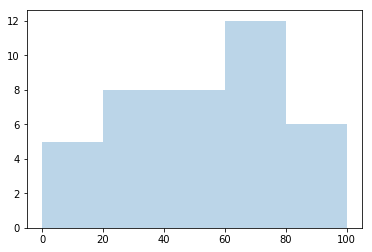

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity
0,,,,,,,,,,,,,,,,
WestDock_bin_009sub_bin_01_mini,k__Bacteria,19.2982,0,72,869749,5449,57,103,897,0.887977,0.487911,0.0113293,33207,12079.8,16396,0.0
WestDock_bin_025sub_bin_01_mini_subbin_3,k__Bacteria,18.9655,0,20,184212,5449,58,104,216,0.944841,0.377978,0.0114058,21525,9210.6,9290,0.0
WestDock_bin_019sub_bin_02_mini_subbin_5,k__Bacteria,18.9655,1.72414,101,1124782,5449,58,104,1119,0.885546,0.395013,0.0111138,48627,11136.5,10956,100.0
WestDock_bin_025sub_bin_01_mini_subbin_2,k__Bacteria,18.9655,3.44828,26,258044,5449,58,104,297,0.942959,0.373006,0.0142903,22000,9924.77,11548,100.0
WestDock_bin_019sub_bin_01_mini_subbin_4,k__Bacteria,17.2414,0,26,282441,5449,58,104,271,0.891439,0.394358,0.0110347,26841,10863.1,12629,0.0
WestDock_bin_019sub_bin_02_mini_subbin_2,k__Bacteria,17.2414,0,26,282441,5449,58,104,271,0.891439,0.394358,0.0110347,26841,10863.1,12629,0.0
WestDock_bin_023sub_bin_04_mini_subbin_5,k__Bacteria,17.2414,0,25,291109,5449,58,104,263,0.931534,0.416322,0.00862664,27438,11644.4,13991,0.0
WestDock_bin_009sub_bin_02_mini_subbin_1,root,16.6667,0,41,550726,5656,24,56,579,0.889789,0.477944,0.017851,35075,13432.3,17066,0.0
WestDock_bin_041sub_bin_01_mini_subbin_0,k__Bacteria,15.7738,0,45,402427,5449,56,101,432,0.888695,0.362463,0.023581,18947,8942.82,9283,0.0


In [1118]:
plt.hist(cm_mini_old_wp['Strain heterogeneity'],range(0,120,20),alpha=.3)
plt.show()
checkmdf_nope

In [1099]:
cm_mini_old_wp['Contamination'].astype(float).round(2)
#cm_mini_old_wp['Strain heterogeneity']
type(cm_mini_old.loc['WestDock_bin_051_mini','Contamination'])

float

In [1119]:
len(checkmdf_nope)
list(range(30,90,10))

[30, 40, 50, 60, 70, 80]

In [974]:
%time
maindf = 'Permafrost/WestDock/20180904hdbfinal_bulk'# df containing contigs (in this case bulk or mini)
fastadir = 'Permafrost/WestDock/bins/fasta/'
log = 'yes' # cluster in log space or not
binnum = '088'# bin number (as noted in maindf 'DBclusternum', column 'subnum will be altered here, and saved)
subnum = '01'
minCS = 15
minS = 1
ASC = True
CSM = 'eom' # 'leaf' or 'eom'
keys = ['expt_name','min_cluster_size','min_samples','allow_single_cluster','log','bin_number','subbin_num','cluster_selection_method']#,'tsne']
values = [expt_name,minCS,minS,ASC,log,binnum,subnum,CSM]
inlist = dict(zip(keys,values))
hdbsub.subcluster_bin(maindf,fastadir,**inlist)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.58 µs


/home/bojk/Data/subcluster_bins.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['subclusternum'] = labels[0:len(df)] #add cluster numbers to main df
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


-1
0


In [989]:
hdbfinal[hdbfinal['Bin']=='007']['Lineage Phylum'].value_counts()

Unassigned        391
Euryarchaeota      64
Firmicutes          7
Crenarchaeota       4
Thaumarchaeota      3
Aigarchaeota        2
Proteobacteria      2
Chloroflexi         1
Name: Lineage Phylum, dtype: int64

In [994]:
checkmdf_bulk = cm.make_checkm_output_df('Permafrost/WestDock/bins/fasta/subfasta/checkm/bulkhdbtest/','bulkhdbtest')

In [997]:
# good bins
checkmdf_bulk[(checkmdf_bulk['Completeness']>=20)&(checkmdf_bulk['Contamination']>5)&(checkmdf_bulk['Strain heterogeneity']>5)]


,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity
0,,,,,,,,,,,,,,,,
WestDock_bin_012sub_bin_03_bulk_subbin_1,k__Archaea,97.1963,71.3995,131,1874391,207,107,149,2134,0.850732,0.47905,0.0220308,120628,14308.3,17433,91.28
WestDock_bin_012sub_bin_01_bulk_subbin_0,k__Archaea,97.1963,71.3995,131,1874391,207,107,149,2134,0.850732,0.47905,0.0220308,120628,14308.3,17433,91.28
WestDock_bin_012sub_bin_02_bulk_subbin_1,k__Archaea,96.2617,71.3995,128,1850801,207,107,149,2102,0.852235,0.479179,0.0221138,120628,14459.4,17433,91.28
WestDock_bin_012sub_bin_02_bulk_subbin_0,k__Archaea,84.1121,47.1963,157,1965415,207,107,149,2215,0.840644,0.488327,0.0210057,59630,12518.6,14752,98.46
WestDock_bin_012sub_bin_01_bulk_subbin_1,k__Archaea,84.1121,48.1308,195,2261922,207,107,149,2561,0.833397,0.488327,0.0230614,59630,11599.6,13208,98.48
WestDock_bin_029sub_bin_02_bulk_subbin_1,k__Bacteria,77.0335,68.235,45,1568509,5449,57,103,1667,0.930183,0.350558,0.0171078,190109,34855.8,58845,100.00
WestDock_bin_029sub_bin_01_bulk_subbin_0,k__Bacteria,77.0335,68.235,43,1556248,5449,57,103,1656,0.929884,0.350359,0.0164181,190109,36191.8,58845,100.00
WestDock_bin_012sub_bin_03_bulk_subbin_0,k__Archaea,74.7664,28.5047,109,1467284,207,107,149,1631,0.85398,0.487435,0.021303,59630,13461.3,17494,97.50
WestDock_bin_039sub_bin_02_bulk_subbin_1,k__Bacteria,72.4138,20.6897,175,2810335,5449,58,104,2484,0.942359,0.473752,0.0132222,91213,16059.1,24740,100.00


In [1]:
nums = list(range(90,555,1))
#nums = ['genome_cluster']+nums

In [1150]:
def make_genome_cluster_file()
nums2 = ['genome_cluster']
for n in nums:
    if len(str(n))==1:
        nums2 = nums2+['00'+str(n)]
    elif len(str(n))==2:
        nums2 = nums2+['0'+str(n)]
        
with open('genome_cluster_file.txt', 'w') as f:
    for item in nums2:
        f.write("%s\n" % item)

In [2]:
def make_genome_cluster_file(bins):
    nums = list(range(bins))
    nums2 = ['genome_cluster']
    for n in nums:
        nums2.append("{0:0=3d}".format(n))
    with open('genome_cluster_file.txt', 'w') as f:
        for item in nums2:
            f.write("%s\n" % item)

In [2]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import sys
import pymer



/usr/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
westdock_5mers = pd.read_table('Permafrost/westdock_5mers.txt',header=None)

In [3]:
westdock_5mers.to_pickle('Permafrost/westdock.5mers.pickle')

In [3]:
westdock_5mers = pd.read_pickle('5mers')
kc = pymer.ExactKmerCounter(5)
kc.consume('ACTTGCAAAAAGAGAAAGATTTAA')
a = kc.to_dict()
ind2 =pd.DataFrame.from_dict(a,orient='index').index


In [14]:
kmertable.T.fillna(0)


,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
SuperContig_k91_2863_flag=0_multi=9.2367_len=5169_WestDock5_Bulk,71.0,31.0,22.0,35.0,13.0,19.0,10.0,8.0,7.0,11.0,...,7.0,10.0,8.0,7.0,6.0,4.0,6.0,20.0,10.0,22.0
SuperContig_k91_8038_flag=0_multi=11.0686_len=5816_WestDock5_Bulk,40.0,16.0,15.0,14.0,9.0,14.0,9.0,11.0,9.0,10.0,...,8.0,13.0,6.0,8.0,2.0,3.0,7.0,20.0,10.0,38.0
SuperContig_k91_26778_flag=0_multi=10.7699_len=9667_WestDock5_Bulk,63.0,36.0,21.0,49.0,23.0,25.0,11.0,13.0,13.0,17.0,...,15.0,16.0,17.0,15.0,11.0,9.0,32.0,36.0,25.0,79.0
SuperContig_k91_43392_flag=0_multi=10.6569_len=7220_WestDock5_Bulk,48.0,18.0,18.0,23.0,5.0,9.0,16.0,8.0,12.0,9.0,...,13.0,15.0,11.0,8.0,8.0,10.0,26.0,23.0,16.0,50.0
SuperContig_k91_50635_flag=0_multi=11.1989_len=5124_WestDock5_Bulk,70.0,18.0,18.0,29.0,5.0,13.0,3.0,8.0,9.0,11.0,...,7.0,12.0,7.0,12.0,12.0,14.0,24.0,20.0,17.0,55.0
SuperContig_k91_76923_flag=0_multi=10.3155_len=5724_WestDock5_Bulk,25.0,9.0,8.0,10.0,8.0,9.0,8.0,10.0,6.0,7.0,...,10.0,14.0,16.0,6.0,9.0,7.0,20.0,35.0,14.0,52.0
SuperContig_k91_95851_flag=0_multi=11.2443_len=5495_WestDock5_Bulk,68.0,24.0,13.0,33.0,8.0,18.0,9.0,6.0,5.0,13.0,...,10.0,18.0,10.0,6.0,11.0,6.0,19.0,31.0,17.0,65.0
SuperContig_k91_123033_flag=0_multi=9.6778_len=6426_WestDock5_Bulk,63.0,19.0,23.0,31.0,16.0,13.0,12.0,6.0,6.0,16.0,...,11.0,9.0,4.0,15.0,5.0,6.0,10.0,25.0,13.0,33.0
SuperContig_k91_143921_flag=0_multi=10.2509_len=5168_WestDock5_Bulk,21.0,7.0,17.0,13.0,3.0,5.0,7.0,7.0,14.0,7.0,...,6.0,17.0,4.0,2.0,8.0,5.0,7.0,15.0,7.0,29.0
SuperContig_k91_147840_flag=0_multi=9.8919_len=7128_WestDock5_Bulk,59.0,17.0,24.0,24.0,9.0,15.0,6.0,4.0,11.0,16.0,...,14.0,7.0,14.0,17.0,14.0,4.0,19.0,26.0,17.0,69.0


In [6]:
adf = pd.DataFrame.from_dict(a,orient='index')

In [15]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(kmertable.T.fillna(0))
embedding.shape

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 4))



LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
module 'numba.npyufunc.workqueue' has no attribute 'parallel_for'

File "../../../usr/lib/python3.6/site-packages/umap/umap_.py", line 88:
def smooth_knn_dist(distances, k, n_iter=64, local_connectivity=1.0, bandwidth=1.0):
    <source elided>
    target = np.log2(k) * bandwidth
    rho = np.zeros(distances.shape[0])
    ^

[1] During: lowering "id=16[LoopNest(index_variable = parfor_index.1100, range = (0, distances_size0.1068, 1))]{829: <ir.Block at /usr/lib/python3.6/site-packages/umap/umap_.py (88)>}Var(parfor_index.1100, /usr/lib/python3.6/site-packages/umap/umap_.py (88))" at /usr/lib/python3.6/site-packages/umap/umap_.py (88)
-------------------------------------------------------------------------------
This should not have happened, a problem has occurred in Numba's internals.

Please report the error message and traceback, along with a minimal reproducer
at: https://github.com/numba/numba/issues/new

If more help is needed please feel free to speak to the Numba core developers
directly at: https://gitter.im/numba/numba

Thanks in advance for your help in improving Numba!


In [6]:
reducer

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)

In [3]:
import HTSeq
#ind = pd.read_pickle('5mers').index
kmertable = pd.DataFrame(index=['AAAAA'],columns=[])
for s in HTSeq.FastaReader('Permafrost/WestDock/bins/fasta/WestDock_bin_002_bulk.fasta'):
    kc = pymer.ExactKmerCounter(5)
    kc.consume(s.seq.decode('utf-8'))#read.sequence)
    a = kc.to_dict()
    b = pd.DataFrame.from_dict(a,orient='index')
    b.rename(index=str,columns={0:s.name},inplace=True)
    kmertable = kmertable.join(b,how='outer')
    

In [17]:
import umap_reducer as ur
import imp
imp.reload(ur)
import matplotlib
import pandas


In [ ]:
ur.umap_reducer('Permafrost/','westdock.5mers.pickle','Permafrost/testwestdock_umap.png')

In [ ]:
embedding = umap.UMAP().fit_transform(kmertable.fillna(0))

In [1]:
embedding.shape

NameError: name 'embedding' is not defined